In [6]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
# sns.set_theme(style="ticks", palette="pastel")

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
carnegie = { 15: "Doctoral/Research Universities--Extensive",\
            16: "Doctoral/Research Universities--Intensive",\
            21: "Masters Colleges and Universities I",\
            22: "Masters Colleges and Universities II",\
            31: "Baccalaureate Colleges--Liberal Arts",\
            32: "Baccalaureate Colleges--General",\
            33: "Baccalaureate/Associates Colleges",\
            40: "Associates Colleges",\
            51: "Theological seminaries and other specialized faith-related institutions",\
            52: "Medical schools and medical centers",\
            53: "Other separate health profession schools",\
            54: "Schools of engineering and technology",\
            55: "Schools of business and management",\
            56: "Schools of art, music, and design",\
            57: "Schools of law",\
            58: "Teachers colleges",\
            59: "Other specialized institutions",\
            60: "Tribal colleges",\
            -2: "Not applicable, not in Carnegie universe (not accredited or nondegree-granting)" }

cipcodes = {1:"AGRICULTURE, AGRICULTURE OPERATIONS, AND RELATED SCIENCES.",\
    3: "NATURAL RESOURCES AND CONSERVATION", 4: "ARCHITECTURE AND RELATED SERVICES.",\
    5: "AREA, ETHNIC, CULTURAL, AND GENDER STUDIES.", 9: "COMMUNICATION, JOURNALISM, AND RELATED PROGRAMS.",\
    10: "COMMUNICATIONS TECHNOLOGIES/TECHNICIANS AND SUPPORT SERVICES.", 11: "COMPUTER AND INFORMATION SCIENCES AND SUPPORT SERVICES.",\
    12: "PERSONAL AND CULINARY SERVICES.",  13: "EDUCATION.", 14: "ENGINEERING.",\
    15: "ENGINEERING TECHNOLOGIES/TECHNICIANS.", 16: "FOREIGN LANGUAGES, LITERATURES, AND LINGUISTICS.",\
    19: "FAMILY AND CONSUMER SCIENCES/HUMAN SCIENCES.", 22: "LEGAL PROFESSIONS AND STUDIES.",\
    23: "ENGLISH LANGUAGE AND LITERATURE/LETTERS.", 24: "LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND HUMANITIES.",\
    25: "LIBRARY SCIENCE.",  26: "BIOLOGICAL AND BIOMEDICAL SCIENCES.", 27: "MATHEMATICS AND STATISTICS.",\
    28: "RESERVE OFFICER TRAINING CORPS (JROTC, ROTC).", 29: "MILITARY TECHNOLOGIES.",\
    30: "MULTI/INTERDISCIPLINARY STUDIES.",         31: "PARKS, RECREATION, LEISURE, AND FITNESS STUDIES.",\
    32: "BASIC SKILLS.", 33: "CITIZENSHIP ACTIVITIES.", 34: "HEALTH-RELATED KNOWLEDGE AND SKILLS.",\
    35: "INTERPERSONAL AND SOCIAL SKILLS.",         36: "LEISURE AND RECREATIONAL ACTIVITIES.",\
    37: "PERSONAL AWARENESS AND SELF-IMPROVEMENT.", 38: "PHILOSOPHY AND RELIGIOUS STUDIES.",\
    39: "THEOLOGY AND RELIGIOUS VOCATIONS.",        40: "PHYSICAL SCIENCES.",\
    41: "SCIENCE TECHNOLOGIES/TECHNICIANS.",        42: "PSYCHOLOGY.",\
    43: "SECURITY AND PROTECTIVE SERVICES.",        44: "PUBLIC ADMINISTRATION AND SOCIAL SERVICE PROFESSIONS.",\
    45: "SOCIAL SCIENCES.",                                  46: "CONSTRUCTION TRADES.",\
    47: "MECHANIC AND REPAIR TECHNOLOGIES/TECHNICIANS.",     48: "PRECISION PRODUCTION.",\
    49: "TRANSPORTATION AND MATERIALS MOVING.",              50: "VISUAL AND PERFORMING ARTS.",\
    51: "HEALTH PROFESSIONS AND RELATED CLINICAL SCIENCES.", 52: "BUSINESS, MANAGEMENT, MARKETING, AND RELATED SUPPORT SERVICES.",\
    53: "HIGH SCHOOL/SECONDARY DIPLOMAS AND CERTIFICATES.",  54: "HISTORY" }

In [23]:
outcomes        = pd.read_csv('../../data/Most-Recent-Cohorts-Field-of-Study.csv') # outcomes
financial_aid   = pd.read_csv('../../data/sfa2122.csv') # Financial aid data 2022
institutions    = pd.read_csv('../../data/hd2022.csv', encoding='cp1252') # institutions

merged_1        = pd.merge(financial_aid, institutions, on = 'UNITID')
merged_2        = pd.merge(merged_1,      outcomes,     on = 'UNITID')
merged_2        = merged_2[merged_2['CARNEGIE']>=0]

In [35]:
merged_2['CARNEGIE_labels'] = merged_2['CARNEGIE'].replace(carnegie).apply(lambda x: x.split('-')[0])
merged_2['CIPCODE_new'] = (merged_2['CIPCODE']/100).astype(int)

merged_2 = merged_2[merged_2['EARN_PELL_WNE_MDN_4YR']     !='PS']
merged_2 = merged_2[merged_2['EARN_COUNT_WNE_1YR']        !='PS']
merged_2 = merged_2[merged_2['EARN_COUNT_PELL_WNE_1YR']   !='PS']
merged_2 = merged_2[merged_2['EARN_COUNT_NOPELL_WNE_1YR'] !='PS']

merged_2['EARN_PELL_WNE_MDN_4YR']      = merged_2['EARN_PELL_WNE_MDN_4YR'].astype(int)
merged_2['EARN_COUNT_WNE_1YR']         = merged_2['EARN_COUNT_WNE_1YR'].astype(int)
merged_2['EARN_COUNT_PELL_WNE_1YR']    = merged_2['EARN_COUNT_PELL_WNE_1YR'].astype(int)
merged_2['EARN_COUNT_NOPELL_WNE_1YR']  = merged_2['EARN_COUNT_NOPELL_WNE_1YR'].astype(int)

merged_2['cip_label'] = merged_2['CIPCODE_new'].replace(cipcodes)
# merged_2.groupby('CIPCODE_new')['EARN_PELL_WNE_MDN_4YR'].median().sort_values()

### 0. CIP Code Earnings

In [48]:
((100*merged_2.groupby('CIPCODE_new')['IPEDSCOUNT2'].sum())/merged_2['IPEDSCOUNT2'].sum()).round(2).sort_values().reset_index().replace(cipcodes)

,CIPCODE_new,IPEDSCOUNT2
0,BASIC SKILLS.,0.0
1,HEALTH-RELATED KNOWLEDGE AND SKILLS.,0.0
2,SCIENCE TECHNOLOGIES/TECHNICIANS.,0.01
3,MILITARY TECHNOLOGIES.,0.06
4,PHILOSOPHY AND RELIGIOUS STUDIES.,0.06
5,"AREA, ETHNIC, CULTURAL, AND GENDER STUDIES.",0.1
6,COMMUNICATIONS TECHNOLOGIES/TECHNICIANS AND SU...,0.1
7,CONSTRUCTION TRADES.,0.11
8,"FOREIGN LANGUAGES, LITERATURES, AND LINGUISTICS.",0.14
9,ARCHITECTURE AND RELATED SERVICES.,0.14


In [47]:
((100*merged_2.groupby('CIPCODE_new')['IPEDSCOUNT1'].sum())/merged_2['IPEDSCOUNT1'].sum()).round(2).sort_values().reset_index().replace(cipcodes)

,CIPCODE_new,IPEDSCOUNT1
0,BASIC SKILLS.,0.00
1,HEALTH-RELATED KNOWLEDGE AND SKILLS.,0.00
2,SCIENCE TECHNOLOGIES/TECHNICIANS.,0.01
3,MILITARY TECHNOLOGIES.,0.06
4,PHILOSOPHY AND RELIGIOUS STUDIES.,0.07
5,CONSTRUCTION TRADES.,0.10
6,"AREA, ETHNIC, CULTURAL, AND GENDER STUDIES.",0.10
7,COMMUNICATIONS TECHNOLOGIES/TECHNICIANS AND SU...,0.11
8,"FOREIGN LANGUAGES, LITERATURES, AND LINGUISTICS.",0.15
9,ARCHITECTURE AND RELATED SERVICES.,0.15


In [50]:
cs = merged_2[merged_2['CIPCODE_new']==11]

cs['IPEDSCOUNT1'].sum()*100/merged_2['IPEDSCOUNT1'].sum(), cs['EARN_COUNT_NOPELL_WNE_1YR'].sum()*100/merged_2['EARN_COUNT_NOPELL_WNE_1YR'].sum()

(3.368707590559032, 2.9541806691076893)

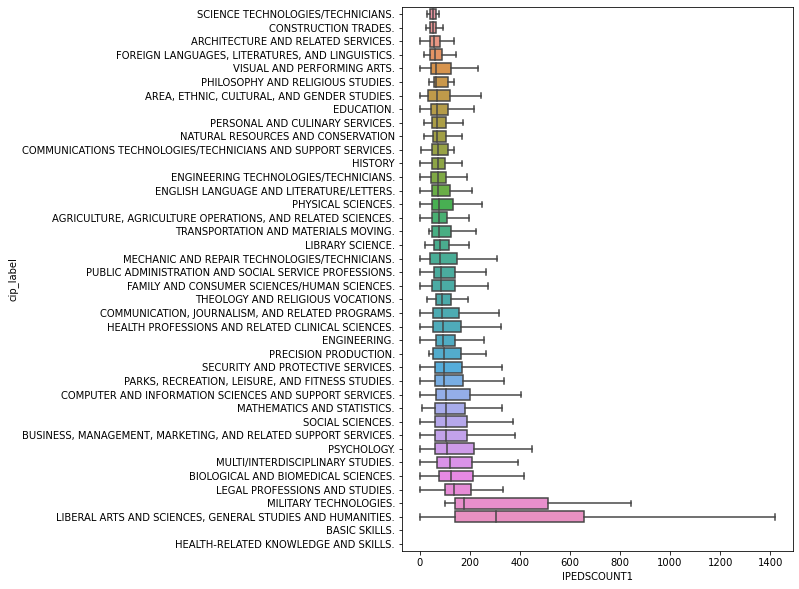

In [38]:
order_labels = list(merged_2.groupby('cip_label')['IPEDSCOUNT1'].median().sort_values().index)
plt.figure(figsize=(7, 10))
ax = sns.boxplot(data=merged_2, y='cip_label', x='IPEDSCOUNT1', showfliers=False, order=order_labels)

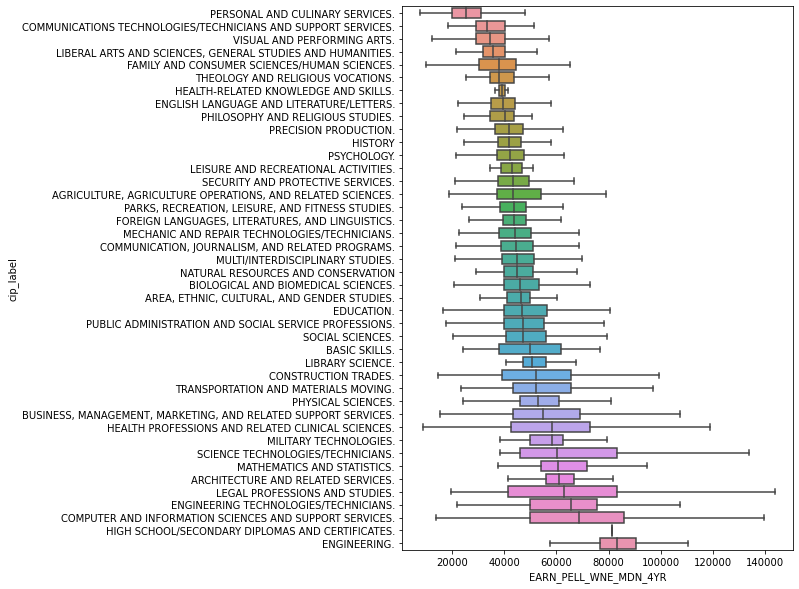

In [19]:
order_labels = list(merged_2.groupby('cip_label')['EARN_PELL_WNE_MDN_4YR'].median().sort_values().index)
plt.figure(figsize=(7, 10))
ax = sns.boxplot(data=merged_2, y='cip_label', x='EARN_PELL_WNE_MDN_4YR', showfliers=False, order=order_labels)

### BoxPlots: Pell Grant vs. No Pell Grant for SAME CARNEGIE type 

In [12]:
filtered = merged_2

filtered = filtered[filtered['EARN_PELL_WNE_MDN_4YR']!='PS']
filtered = filtered[filtered['EARN_NOPELL_WNE_MDN_4YR']!='PS']

filtered['EARN_PELL_WNE_MDN_4YR']  = filtered['EARN_PELL_WNE_MDN_4YR'].astype(float)
filtered['EARN_NOPELL_WNE_MDN_4YR'] = filtered['EARN_NOPELL_WNE_MDN_4YR'].astype(float)

filtered['cs'] = filtered['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))


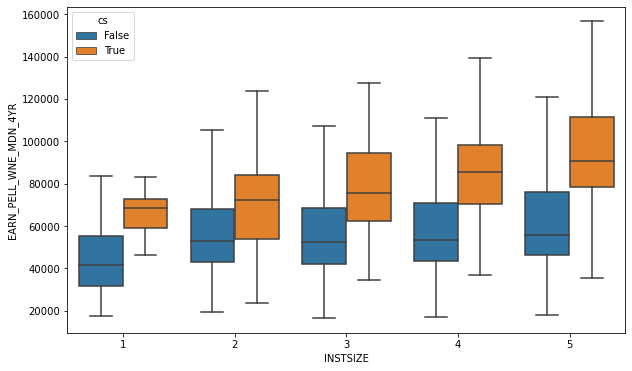

In [13]:

# sns.set_theme(style="ticks", palette="pastel")


plt.figure(figsize=(10, 6))

sns.boxplot(x="INSTSIZE", hue='cs', y="EARN_PELL_WNE_MDN_4YR",  data=filtered, showfliers=False);
# plt.yscale('log')

# sns.despine(offset=10, trim=True)

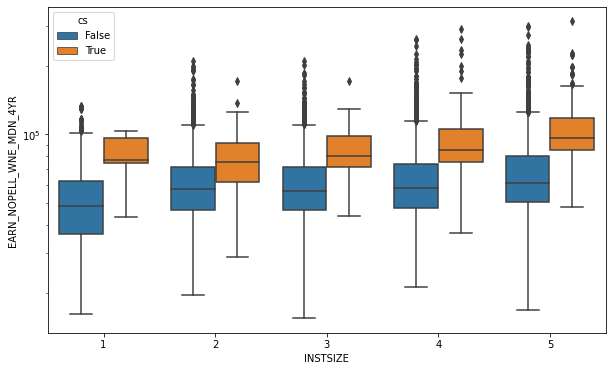

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="INSTSIZE", hue='cs', y="EARN_NOPELL_WNE_MDN_4YR", data=filtered);
plt.yscale('log')
# sns.despine(offset=10, trim=True)

In [15]:
pell_cs   = list(filtered[filtered['cs']]['EARN_PELL_WNE_MDN_4YR'].values)
pell_ncs  = list(filtered[~filtered['cs']]['EARN_PELL_WNE_MDN_4YR'].values)
npell_cs  = list(filtered[filtered['cs']]['EARN_NOPELL_WNE_MDN_4YR'].values)
npell_ncs = list(filtered[~filtered['cs']]['EARN_NOPELL_WNE_MDN_4YR'].values)

(array([4.101e+03, 6.577e+03, 1.992e+03, 6.480e+02, 1.580e+02, 3.200e+01,
        1.600e+01, 9.000e+00, 5.000e+00, 1.000e+00]),
 array([ 16649. ,  45707.7,  74766.4, 103825.1, 132883.8, 161942.5,
        191001.2, 220059.9, 249118.6, 278177.3, 307236. ]),
 <BarContainer object of 10 artists>)

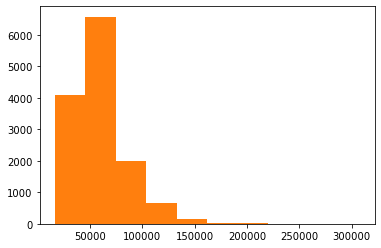

In [16]:
plt.hist(pell_cs)
plt.hist(pell_ncs)

### Figure 1

In [17]:
from scipy.stats import ttest_ind, mannwhitneyu, f_oneway

print("pell - cs vs. noncs %s %s" % ttest_ind(pell_cs, pell_ncs))
print("pell - cs vs. nopell - cs %s %s" % ttest_ind(pell_cs, npell_cs))


pell - cs vs. noncs 22.78543458198461 7.399413454288386e-113
pell - cs vs. nopell - cs -2.7201549743952285 0.006684765467016473


In [18]:
both = both[both['earnings'] != 'PS']

NameError: name 'both' is not defined

In [ ]:
both[~both['cs']]['earnings'].median()

51467.0

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

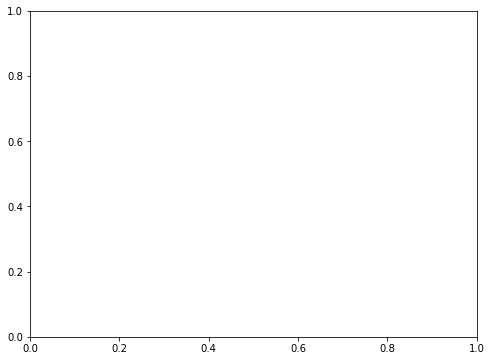

In [ ]:
# csonly = filtered[filtered['cs']]

nopell = filtered[['EARN_NOPELL_WNE_MDN_4YR', 'INSTSIZE', 'CARNEGIE', 'cs']]
pell   = filtered[['EARN_PELL_WNE_MDN_4YR',  'INSTSIZE', 'CARNEGIE', 'cs']]

nopell.rename(columns={'EARN_NOPELL_WNE_MDN_4YR': 'earnings'}, inplace=True)
pell.rename(columns={'EARN_PELL_WNE_MDN_4YR': 'earnings'}, inplace=True)

nopell['pell'] = False 
pell['pell']   = True 

both = pd.concat([nopell, pell]);

plt.figure(figsize=(8, 6));

ax = sns.boxplot(x='cs', y="earnings", hue='pell', data=both, showfliers=False);

plt.plot((-1, 2), (19000, 19000), color='white',      label='\n', linestyle='--')
# plt.plot((-1, 2), (50000, 50000), color='darkorange', label='50K - Annual household\nincome of 90% of\ngrant recepients', linestyle='-')
plt.plot((-1, 2), (60000, 60000), color='darkorange', alpha=0.5, linewidth=3, label='Less than 6% of grant\nrecepients have more\nannual household\nincome of > $ 60,000', linestyle='-')
plt.plot((-1, 2), (19000, 19000), color='white',      label='\n', linestyle='--')
# plt.plot((-1, 2), (30000, 30000), color='darkorange', label='30K - Low income threshold', linestyle='--')
plt.plot((-1, 2), (50000, 50000), color='darkorange', alpha=0.5, linewidth=3, label='90% of grant recepients\n have an annual\n household income of\n< $50,000', linestyle='--')
plt.plot((-1, 2), (19000, 19000), color='white',      label='\n', linestyle='--')
plt.plot((-1, 2), (20000, 20000), color='darkorange', alpha=0.5, linewidth=3, label='51% of Pell Grant \nfunds go to housholds \nwith annual income of\n < $ 20,000', linestyle=':')

plt.xlabel('')
plt.ylabel("Median earnings (USD),\n4 years after completion\n", fontsize=15);

plt.xticks([0, 1], ['Other Areas\nof Study', 'Computer\nScience'], fontsize=15);

plt.legend(prop={'size': 20})
legend = ax.legend(loc=(1.01,0.0), ncol=1)

legend.texts[0].set_text("Did not receive grant")
legend.texts[1].set_text("Pell Grant Recepient")

legend.texts[0].set_size(14)
legend.texts[1].set_size(14)
legend.texts[3].set_size(14)
legend.texts[5].set_size(14)
legend.texts[7].set_size(14)

plt.yticks(fontsize=12)

plt.xlim(-1, 2)

plt.yticks([20000, 50000, 60000, 100_000, 150_000], ["20k", "50k", "60k", "100k", "150k"]);

# plt.grid(axis='y')


In [ ]:
a = legend.texts[0]
help(a.set_text)

Help on method set_text in module matplotlib.text:

set_text(s) method of matplotlib.text.Text instance
    Set the text string *s*.
    
    It may contain newlines (``\n``) or math in LaTeX syntax.
    
    Parameters
    ----------
    s : object
        Any object gets converted to its `str` representation, except for
        ``None`` which is converted to an empty string.



/var/folders/l9/y8y3rmys2sl93tzzph3dl7jw0000gr/T/ipykernel_79105/2116458911.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nopell.rename(columns={'EARN_NOPELL_WNE_MDN_4YR': 'earnings'}, inplace=True)
/var/folders/l9/y8y3rmys2sl93tzzph3dl7jw0000gr/T/ipykernel_79105/2116458911.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pell.rename(columns={'EARN_PELL_WNE_MDN_4YR': 'earnings'}, inplace=True)
/var/folders/l9/y8y3rmys2sl93tzzph3dl7jw0000gr/T/ipykernel_79105/2116458911.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

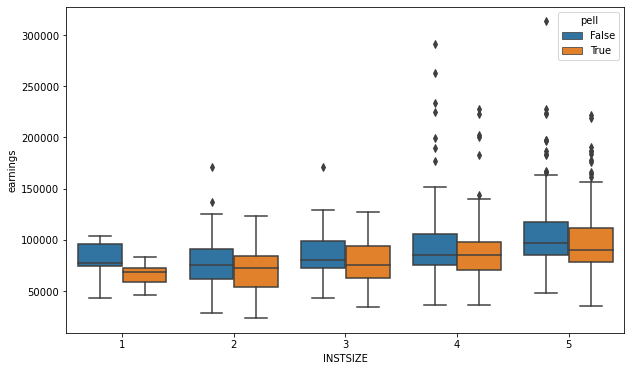

In [ ]:
csonly = filtered[filtered['cs']]

nopell = csonly[['EARN_NOPELL_WNE_MDN_4YR', 'INSTSIZE', 'CARNEGIE', 'cs']]
pell   = csonly[['EARN_PELL_WNE_MDN_4YR',  'INSTSIZE', 'CARNEGIE', 'cs']]

nopell.rename(columns={'EARN_NOPELL_WNE_MDN_4YR': 'earnings'}, inplace=True)
pell.rename(columns={'EARN_PELL_WNE_MDN_4YR': 'earnings'}, inplace=True)

nopell['pell'] = False 
pell['pell']   = True 

both = pd.concat([nopell, pell])

plt.figure(figsize=(10, 6))

sns.boxplot(x='INSTSIZE', y="earnings", hue='pell', data=both);
# plt.yscale('log')
# sns.despine(offset=10, trim=True)

In [ ]:
import seaborn as sns 

sns.boxplot(x='INSTSIZE', y='EARN_PELL_WNE_MDN_4YR', data=filtered)

In [ ]:
filtered.groupby('INSTSIZE')['EARN_PELL_WNE_MDN_4YR'].median().sort_values()

INSTSIZE
1    41257.5
3    53302.5
2    53909.0
4    54801.0
5    57185.0
Name: EARN_PELL_WNE_MDN_4YR, dtype: float64

In [ ]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))

filtered = merged_2[condition]

filtered = filtered[filtered['EARN_PELL_WNE_MDN_4YR']!='PS']
filtered = filtered[filtered['EARN_NOPELL_NE_MDN_3YR']!='PS']

filtered['EARN_PELL_WNE_MDN_4YR']  = filtered['EARN_PELL_WNE_MDN_4YR'].astype(float)
filtered['EARN_NOPELL_NE_MDN_3YR'] = filtered['EARN_NOPELL_NE_MDN_3YR'].astype(float)

stats = filtered.groupby('INSTSIZE')[['EARN_NOPELL_NE_MDN_3YR', 'EARN_PELL_WNE_MDN_4YR']].median()

stats['diff'] = stats.apply(lambda x: "Pell student makes more" if x['EARN_PELL_WNE_MDN_4YR'] > x['EARN_NOPELL_NE_MDN_3YR'] else "NonPell makes more", axis=1)
stats

,EARN_NOPELL_NE_MDN_3YR,EARN_PELL_WNE_MDN_4YR,diff
INSTSIZE,,,
1,62358.5,68608.0,Pell student makes more
2,67722.0,72878.0,Pell student makes more
3,67867.0,75239.0,Pell student makes more
4,73142.0,83638.0,Pell student makes more
5,84119.5,91255.0,Pell student makes more


<!-- 

1. Large schools have fewer pell grant receipients than small schools

2. Students at large schools make more money than students at small schools

3. From 1 and 2, students at universities with small pell grant recepient percentage make more money. 

4. If you hold size of the institution size, students at universities with small pell grant recepient percentage make more money.

5. Pell Grants make more money than non-pell grant students for institutions with the same size.

 -->


In [ ]:
stats = filtered.groupby('CARNEGIE')[['EARN_NOPELL_NE_MDN_3YR', 'EARN_PELL_WNE_MDN_4YR']].median()

stats['diff'] = stats.apply(lambda x: "Pell student makes more" if x['EARN_PELL_WNE_MDN_4YR'] > x['EARN_NOPELL_NE_MDN_3YR'] else "NonPell makes more", axis=1)
stats.sort_index()

,EARN_NOPELL_NE_MDN_3YR,EARN_PELL_WNE_MDN_4YR,diff
CARNEGIE,,,
15,56115.0,60779.0,Pell student makes more
16,54232.0,57905.0,Pell student makes more
21,51145.5,53854.0,Pell student makes more
22,54980.5,55741.5,Pell student makes more
31,48990.0,49402.0,Pell student makes more
32,52621.0,54086.5,Pell student makes more
33,43655.5,46037.0,Pell student makes more
40,41977.0,42470.0,Pell student makes more
51,39395.0,37277.0,NonPell makes more


### 1.   Size/Carnegie, Pell Percent and Median Earnings

#### 1b. Non-Computer Science

/Users/fsultan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


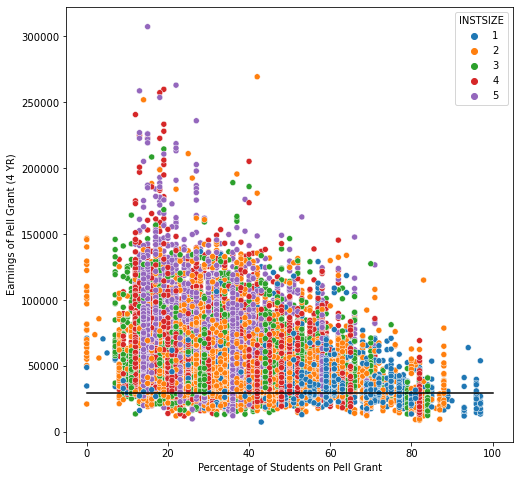

In [ ]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: (len(x)==4 and x.startswith('11')) == False)
majors    = merged_2#merged_2[condition]
majors    = majors[majors['EARN_PELL_WNE_MDN_4YR']!='PS']
x_axis    = majors['UPGRNTP']
y_axis    = majors['EARN_PELL_WNE_MDN_4YR'].astype(int)#.replace('PS', 99999)

plt.figure(figsize=(8, 8))
# ax = sns.scatterplot(x_axis, y_axis, hue = majors['CARNEGIE_labels'].apply(lambda x: x.split(' ')[0]), palette='tab10')
ax = sns.scatterplot(x_axis, y_axis, hue = majors['INSTSIZE'], palette='tab10')
plt.xlabel('Percentage of Students on Pell Grant')
plt.ylabel('Earnings of Pell Grant (4 YR)')
plt.plot((0, 100), (30000, 30000), label='Low income threshold (30K)', color='black')
# plt.yscale('log')
# plt.legend(loc=(1.01, 0))

/Users/fsultan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


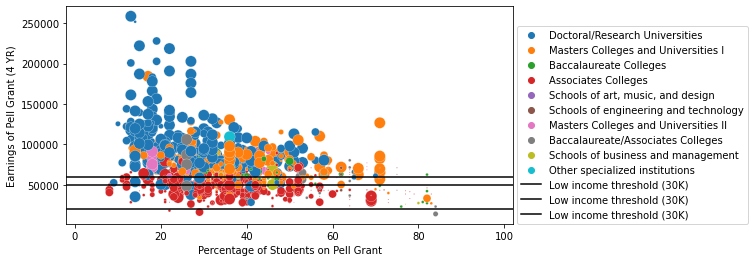

In [ ]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: (len(x)==4 and x.startswith('11')) == True)
majors    = merged_2[condition]
majors    = majors[majors['EARN_PELL_WNE_MDN_4YR']!='PS']
x_axis    = majors['UPGRNTP']
y_axis    = majors['EARN_PELL_WNE_MDN_4YR'].astype(int)#.replace('PS', 99999)

plt.figure(figsize=(8, 4))
# ax = sns.scatterplot(x_axis, y_axis, hue = majors['CARNEGIE_labels'], palette='tab10', alpha=0.2, s=majors['INSTSIZE']**4, marker="$\circ$", ec="face")
ax = sns.scatterplot(x_axis, y_axis, hue = majors['CARNEGIE_labels'], palette='tab10', s=majors['INSTSIZE']**3)
# ax = sns.scatterplot(x_axis, y_axis, hue = majors['INSTSIZE'], palette='tab10')#majors['INSTSIZE']**2) 
plt.xlabel('Percentage of Students on Pell Grant')
plt.ylabel('Earnings of Pell Grant (4 YR)')
plt.plot((-10, 110), (20000, 20000), label='Low income threshold (30K)', color='black')
plt.plot((-10, 110), (50000, 50000), label='Low income threshold (30K)', color='black')
plt.plot((-10, 110), (60000, 60000), label='Low income threshold (30K)', color='black')
# plt.yscale('log')
# plt.xscale('log')
plt.xlim(-2, 102)
plt.legend(loc=(1.01, 0))

### Figure 2

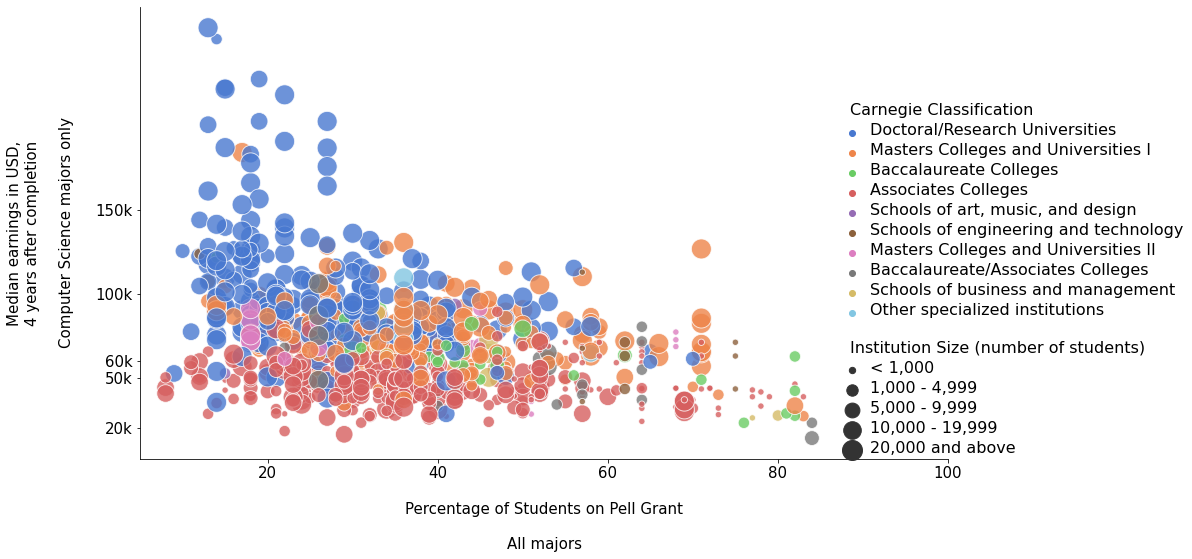

In [ ]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: (len(x)==4 and x.startswith('11')) == True)
majors    = merged_2[condition]
majors    = majors[majors['EARN_PELL_WNE_MDN_4YR']!='PS']
x_axis    = majors['UPGRNTP']
y_axis    = majors['EARN_PELL_WNE_MDN_4YR'].astype(int)

ax = sns.relplot(x="UPGRNTP", y="EARN_PELL_WNE_MDN_4YR", hue="CARNEGIE_labels", size="INSTSIZE",
            sizes=(40, 400), alpha=0.8, palette="muted",
            height=7, aspect=1.8, data=majors, legend='full')

plt.xlabel('\nPercentage of Students on Pell Grant\n\nAll majors', fontsize=15)
# plt.ylabel('Earnings of Pell Grant (4 YR)\n', fontsize=15)
plt.ylabel("Median earnings in USD,\n4 years after completion\n\nComputer Science majors only\n", fontsize=15);

ax.legend.get_texts()[0].set_text('Carnegie Classification')
ax.legend.get_texts()[11].set_text('\nInstitution Size (number of students)')
ax.legend.get_texts()[12].set_text('< 1,000')
ax.legend.get_texts()[13].set_text('1,000 - 4,999')
ax.legend.get_texts()[14].set_text('5,000 - 9,999')
ax.legend.get_texts()[15].set_text('10,000 - 19,999')
ax.legend.get_texts()[16].set_text('20,000 and above')

plt.setp(ax.legend.get_texts(), fontsize='16') # for legend text
plt.setp(ax.legend.get_title(), fontsize='18') # for legend title

plt.yticks([20000, 50000, 60000, 100_000, 150_000], ["20k", "50k", "60k", "100k", "150k"], fontsize=15);
plt.xlim(5, 100);
# plt.ylim(0, 260_000);
plt.xticks(fontsize=15);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


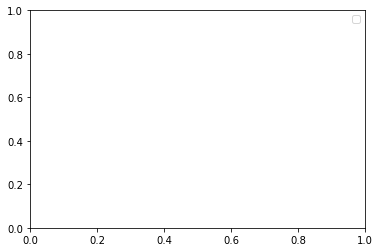

In [ ]:
plt.legend()

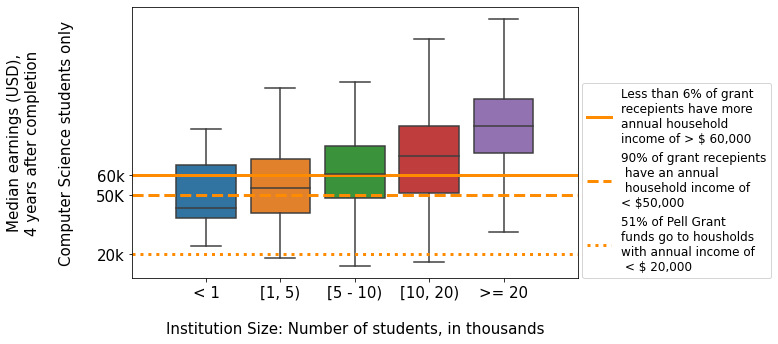

In [ ]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: (len(x)==4 and x.startswith('11')) == True)
majors    = merged_2[condition]
majors    = majors[majors['EARN_PELL_WNE_MDN_4YR']!='PS']
majors['INSTSIZE'] = majors['INSTSIZE'].astype(int)
majors['EARN_PELL_WNE_MDN_4YR'] = majors['EARN_PELL_WNE_MDN_4YR'].astype(int)

plt.figure(figsize=(8, 5))
# ax = sns.scatterplot(data=majors, x='INSTSIZE', y='EARN_PELL_WNE_MDN_4YR', hue='INSTSIZE', palette='tab10')
# ax = sns.boxplot(data=majors, y='INSTSIZE', x='EARN_PELL_WNE_MDN_4YR', orient='h', palette='tab10', showfliers=False)#majors['INSTSIZE']**2) 
ax = sns.boxplot(data=majors, x='INSTSIZE', y='EARN_PELL_WNE_MDN_4YR', showfliers=False)#majors['INSTSIZE']**2) 
plt.xlabel('\nInstitution Size: Number of students, in thousands', fontsize=15)
plt.ylabel('Earnings of Pell Grant (4 YR)\n\nComputer Science students only\n', fontsize=15)
plt.ylabel("Median earnings (USD),\n4 years after completion\n\nComputer Science students only\n", fontsize=15);
plt.xticks([0, 1, 2, 3, 4], \
           ['< 1', '[1, 5)', '[5 - 10)', '[10, 20)','>= 20'],\
            fontsize=15);
plt.yticks(fontsize=15);
# plt.plot((-10, 110), (20000, 20000), label='Low income threshold (30K)', color='black')
# plt.plot((-10, 110), (50000, 50000), label='Low income threshold (30K)', color='black')
# plt.plot((-10, 110), (60000, 60000), label='Low income threshold (30K)', color='black')
plt.plot((-1, 5), (60000, 60000), color='darkorange', alpha=1, linewidth=3, label='Less than 6% of grant\nrecepients have more\nannual household\nincome of > $ 60,000', linestyle='-')
plt.plot((-1, 5), (50000, 50000), color='darkorange', alpha=1, linewidth=3, label='90% of grant recepients\n have an annual\n household income of\n< $50,000', linestyle='--')
plt.plot((-1, 5), (20000, 20000), color='darkorange', alpha=1, linewidth=3, label='51% of Pell Grant \nfunds go to housholds \nwith annual income of\n < $ 20,000', linestyle=':')
plt.yticks([20000, 50000, 60000], ["20k", "50K", "60k"])
plt.xlim(-1, 5)
plt.legend(loc=(1.01, 0), fontsize=12)
# ax.get_legend().remove()

#### 1a. Computer Science

In [ ]:
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
majors    = merged_2[condition]
majors    = majors[majors['EARN_PELL_WNE_MDN_4YR']!='PS']
x_axis    = majors['UPGRNTP']
y_axis    = majors['EARN_PELL_WNE_MDN_4YR'].astype(int)#.replace('PS', 99999)

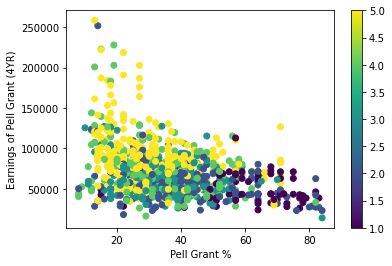

In [ ]:

plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Earnings of Pell Grant (4YR)')
# plt.yscale('log')
plt.colorbar()

# Median household income 74 K
# Low income household: 30 K 
# 

In [ ]:
# condition = (merged_2['CIPCODE'] == 1101) | (merged_2['CIPCODE'] == 1104) | (merged_2['CIPCODE'] == 1110)
condition = merged_2['CIPCODE'].astype(str).apply(lambda x: len(x)==4 and x.startswith('11'))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']

y_axis = majors['EARN_PELL_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

In [ ]:
majors['CARNEGIE_labels'].value_counts()

Associates Colleges                      330
Doctoral/Research Universities           292
Masters Colleges and Universities I      232
Baccalaureate Colleges                    37
Baccalaureate/Associates Colleges         29
Masters Colleges and Universities II      19
Schools of engineering and technology     13
Schools of business and management        10
Other specialized institutions             7
Schools of art, music, and design          4
Name: CARNEGIE_labels, dtype: int64

/Users/fsultan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


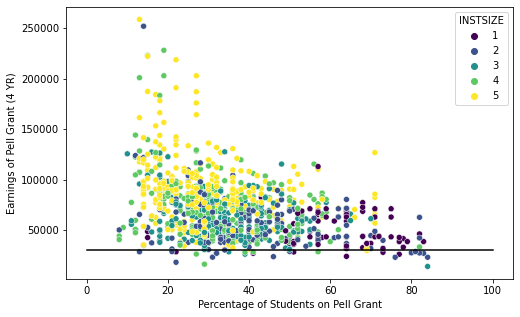

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(x_axis, y_axis, hue = majors['INSTSIZE'], palette = 'viridis')
plt.xlabel('Percentage of Students on Pell Grant')
plt.ylabel('Earnings of Pell Grant (4 YR)')
plt.plot((0, 100), (30000, 30000), label='Low income threshold', color='black')
# plt.yscale('log')

#Colorbar using carnegie labels instead of carnegie numbers
# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks(majors['CARNEGIE'])
# colorbar.set_ticklabels(majors['CARNEGIE_labels'])

In [ ]:
condition = (merged_2['CIPCODE'] == 1101) | (merged_2['CIPCODE'] == 1104) | (merged_2['CIPCODE'] == 1110)
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

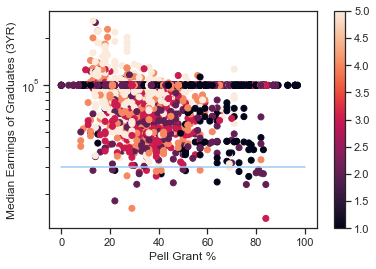

In [ ]:

plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Graduates (3YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [ ]:
condition = (merged_2['CIPCODE'] == 1101) | (merged_2['CIPCODE'] == 1104) | (merged_2['CIPCODE'] == 1110)
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_MDN_4YR'].replace('PS', 0).fillna(0).astype(int)

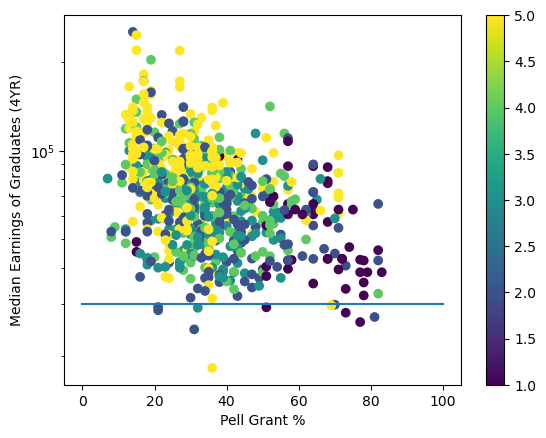

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Graduates (4YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [ ]:
condition = (merged_2['CIPCODE'] == 1101) | (merged_2['CIPCODE'] == 1104) | (merged_2['CIPCODE'] == 1110)
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_MALE_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

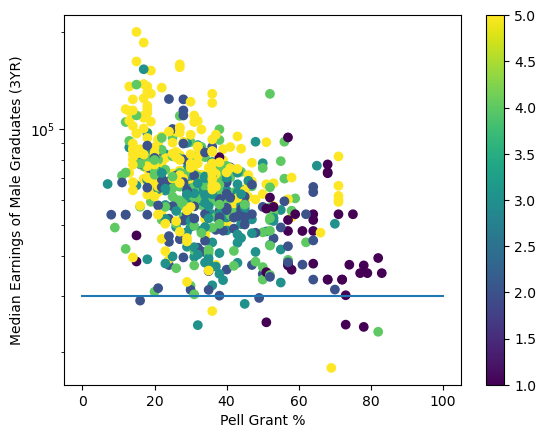

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Male Graduates (3YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [ ]:
condition = (merged_2['CIPCODE'] == 1101) | (merged_2['CIPCODE'] == 1104) | (merged_2['CIPCODE'] == 1110)
majors = merged_2[~condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

In [ ]:
tmp = pd.DataFrame()
tmp['earnings'] = merged_2['EARN_NOMALE_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)
tmp['pell_%'] = merged_2['UPGRNTP']
tmp['cs'] = condition

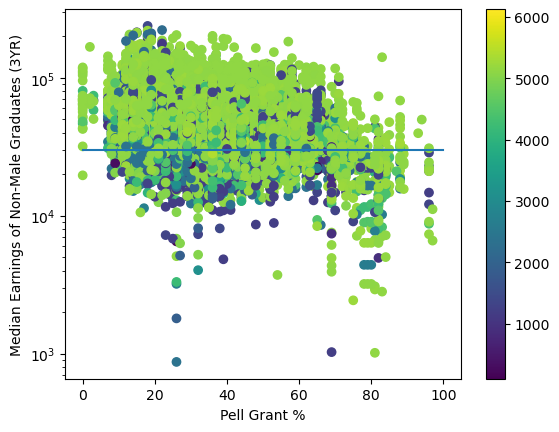

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['CIPCODE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (3YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

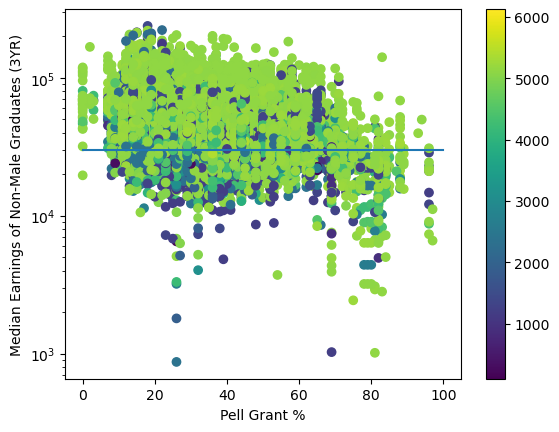

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['CIPCODE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (3YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [ ]:
condition = (merged_2['CIPCODE'] == 1101) | (merged_2['CIPCODE'] == 1104) | (merged_2['CIPCODE'] == 1110)
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_NOMALE_WNE_MDN_4YR'].replace('PS', 0).fillna(0).astype(int)

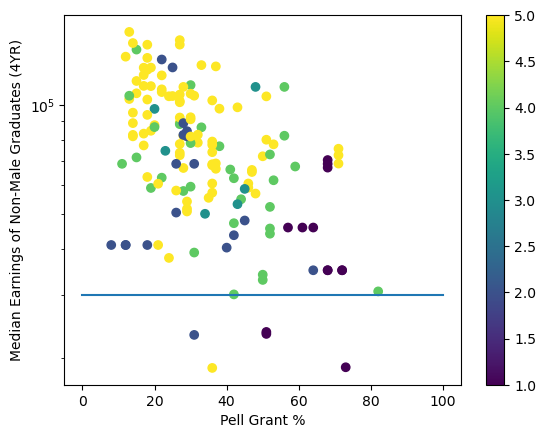

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Non-Male Graduates (4YR)')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

### 1b. Southeast Plots

In [ ]:
condition = (merged_2['CIPCODE'] == 1101) | (merged_2['CIPCODE'] == 1104) | (merged_2['CIPCODE'] == 1110) & (merged_2['STABBR'].isin(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_WNE_MDN_4YR'].replace('PS', 0).astype(int)

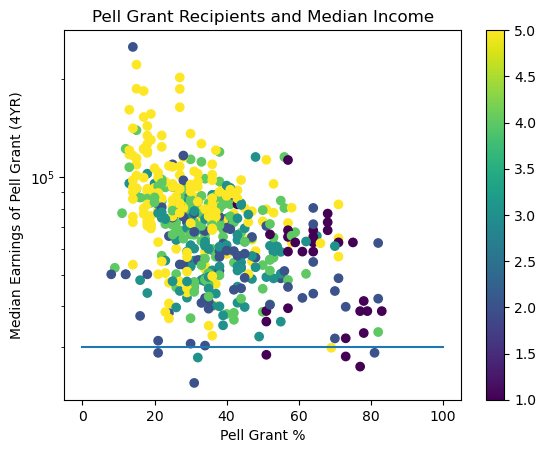

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(x_axis, y_axis, c = majors['INSTSIZE'])
plt.xlabel('Pell Grant %')
plt.ylabel('Median Earnings of Pell Grant (4YR)')
plt.title('Pell Grant Recipients and Median Income')
plt.plot((0, 100), (30000, 30000))
plt.yscale('log')
plt.colorbar()

In [ ]:
condition = (merged_2['CIPCODE'] == 1101) | (merged_2['CIPCODE'] == 1104) | (merged_2['CIPCODE'] == 1110) & (merged_2['STABBR'].isin(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']))
majors = merged_2[condition]
x_axis = majors['UPGRNTP']
y_axis = majors['EARN_PELL_NE_MDN_3YR'].replace('PS', 0).fillna(0).astype(int)

### 2. Income (CS vs. Non-CS)

In [ ]:
condition = (merged_2['CIPCODE'] == 1101) | (merged_2['CIPCODE'] == 1104) | (merged_2['CIPCODE'] == 1110) & (merged_2['STABBR'].isin(['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV']))
merged_2['cs'] = condition

filtered = merged_2#[merged_2['EARN_PELL_WNE_MDN_4YR'].apply(lambda x: x.isnumeric())]

filtered['EARN_PELL_WNE_MDN_4YR'] = filtered['EARN_PELL_WNE_MDN_4YR'].astype(float)

# filtered[filtered['EARN_PELL_WNE_MDN_4YR']==0]

filtered.groupby('cs')['EARN_PELL_WNE_MDN_4YR'].mean()

cs
False    53486.906499
True     72509.936255
Name: EARN_PELL_WNE_MDN_4YR, dtype: float64

#### Figure 3

/var/folders/l9/y8y3rmys2sl93tzzph3dl7jw0000gr/T/ipykernel_92717/4216285905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncs['UPGRNTP'] = ((ncs['UPGRNTP']/5).astype(int))*5
/var/folders/l9/y8y3rmys2sl93tzzph3dl7jw0000gr/T/ipykernel_92717/4216285905.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs['UPGRNTP'] = ((cs['UPGRNTP']/5).astype(int))*5


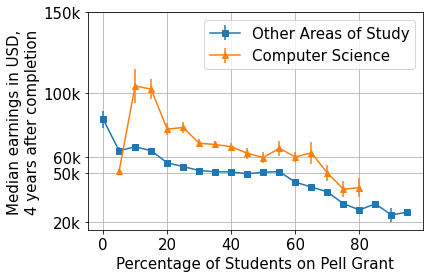

In [ ]:

cs = filtered[filtered['cs']]
ncs = filtered[~filtered['cs']]

ncs['UPGRNTP'] = ((ncs['UPGRNTP']/5).astype(int))*5
ncs_avgs = ncs.groupby('UPGRNTP')['EARN_PELL_WNE_MDN_4YR'].mean()
ncs_sems = ncs.groupby('UPGRNTP')['EARN_PELL_WNE_MDN_4YR'].sem()
plt.errorbar(x=ncs_avgs.index, y=ncs_avgs,  yerr=ncs_sems, marker='s', label='Other Areas of Study')

cs['UPGRNTP'] = ((cs['UPGRNTP']/5).astype(int))*5
cs_avgs = cs.groupby('UPGRNTP')['EARN_PELL_WNE_MDN_4YR'].mean()
cs_sems = cs.groupby('UPGRNTP')['EARN_PELL_WNE_MDN_4YR'].sem()
plt.errorbar(x=cs_avgs.index, y=cs_avgs, yerr=cs_sems, marker='^', label='Computer Science')

plt.grid()
plt.legend(fontsize=15)

plt.xlabel('Percentage of Students on Pell Grant', fontsize=15)
plt.ylabel("Median earnings in USD,\n4 years after completion", fontsize=15);

plt.yticks([20000, 50000, 60000, 100_000, 150_000], ["20k", "50k", "60k", "100k", "150k"], fontsize=15);
# plt.xlim(5, 100);
# plt.ylim(0, 260_000);
plt.xticks(fontsize=15);

### Figure 4

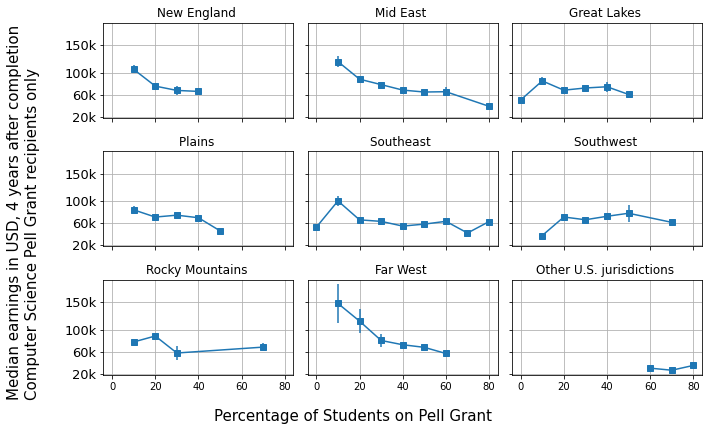

In [ ]:
filtered['OBEREG']
cs = filtered[filtered['cs']]

region_labels = {0: 'U.S. Service schools', 1: 'New England (CT, ME, MA, NH, RI, VT)', 2: 'Mid East (DE, DC, MD, NJ, NY, PA)',\
                3: 'Great Lakes (IL, IN, MI, OH, WI)', 4: 'Plains (IA, KS, MN, MO, NE, ND, SD)',\
                5: 'Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)', 6: 'Southwest (AZ, NM, OK, TX)',\
                7: 'Rocky Mountains (CO, ID, MT, UT, WY)', 8: 'Far West (AK, CA, HI, NV, OR, WA)',\
                9: 'Other U.S. jurisdictions (AS, FM, GU, MH, MP, PR, PW, VI)'}

fig, axs = plt.subplots(3, 3, figsize=(10, 6), sharey=True, sharex=True);

axs = axs.flatten()

for region in range(1, 10):
    cs_region = cs[cs['OBEREG']==region]
    cs_region['UPGRNTP'] = ((cs_region['UPGRNTP']/10).astype(int))*10
    cs_avgs = cs_region.groupby('UPGRNTP')['EARN_PELL_WNE_MDN_4YR'].mean()
    cs_sems = cs_region.groupby('UPGRNTP')['EARN_PELL_WNE_MDN_4YR'].sem()
    axs[region-1].errorbar(x=cs_avgs.index, y=cs_avgs,  yerr=cs_sems, marker='s')
    title = region_labels[region]
    axs[region-1].set_title(title[:title.find('(')])
    axs[region-1].grid(axis='both')
    axs[region-1].set_yticks([20_000, 60_000, 100_000, 150_000])
    axs[region-1].set_yticks([20000, 60000, 100_000, 150_000], ["20k", "60k", "100k", "150k"], fontsize=13);

fig.supxlabel('Percentage of Students on Pell Grant', fontsize=15);
fig.supylabel('Median earnings in USD, 4 years after completion\nComputer Science Pell Grant recipients only\n', fontsize=15);

plt.tight_layout()

In [ ]:
import numpy as np 
def plot_errorbars(arg, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    x = np.random.normal(0, 1, 100)
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])

# sns.regplot(x=cs['UPGRNTP'], y=cs['EARN_PELL_WNE_MDN_4YR'])
sns.errorbar(x=ncs['UPGRNTP'], y=ncs['EARN_PELL_WNE_MDN_4YR'])

AttributeError: module 'seaborn' has no attribute 'errorbar'

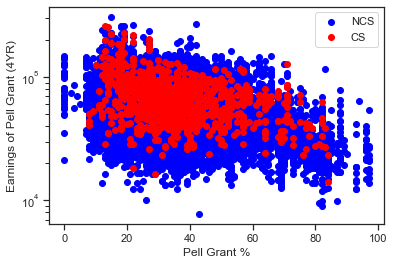

In [ ]:
from matplotlib import pyplot as plt

cs = filtered[filtered['cs']]
ncs = filtered[~filtered['cs']]

x_axis = ncs['UPGRNTP']
y_axis = ncs['EARN_PELL_WNE_MDN_4YR'].replace('PS', 99999).astype(int)
plt.scatter(x_axis, y_axis, c = 'Blue', label='NCS')

x_axis = cs['UPGRNTP']
y_axis = cs['EARN_PELL_WNE_MDN_4YR'].replace('PS', 99999).astype(int)
plt.scatter(x_axis, y_axis, c = 'Red', label='CS')

plt.xlabel('Pell Grant %')
plt.ylabel('Earnings of Pell Grant (4YR)')
plt.yscale('log')
# plt.colorbar()
plt.legend()

### Regions

(20.0, 55.0)

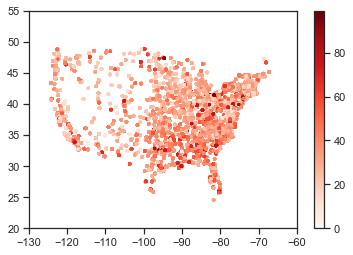

In [ ]:
from matplotlib import pyplot as plt 
plt.scatter(merged_2['LONGITUD'], \
            merged_2['LATITUDE'], \
            c=merged_2['UPGRNTP'], \
            s=5, cmap='Reds')
plt.colorbar()
plt.xlim(-130, -60)
plt.ylim(20, 55)

Text(0, 0.5, 'Number of institutions')

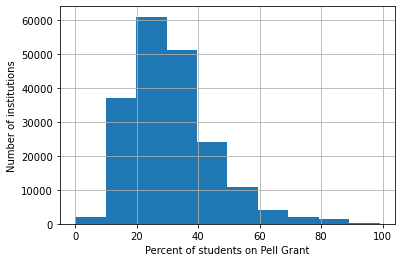

In [ ]:
merged_2['UPGRNTP'].hist()
plt.xlabel('Percent of students on Pell Grant')
plt.ylabel('Number of institutions')

### Pell Grant vs. CARNEGIE AND INSTSIZE

In [ ]:
merged_2.groupby('INSTSIZE')['UPGRNTP'].mean()

INSTSIZE
1    44.712306
2    32.394549
3    30.889673
4    28.165402
5    26.913585
Name: UPGRNTP, dtype: float64

In [ ]:
merged_2[merged_2['CARNEGIE']==55]['INSTNM_x']

16833                Golden Gate University
16834                Golden Gate University
16835                Golden Gate University
16836                Golden Gate University
16837                Golden Gate University
                        ...                
199558    Schiller International University
199559    Schiller International University
199560    Schiller International University
199561    Schiller International University
199562    Schiller International University
Name: INSTNM_x, Length: 903, dtype: object

In [ ]:
merged_2.groupby('CARNEGIE')['UPGRNTP'].mean().sort_values()

CARNEGIE
15    22.984024
31    27.745283
52    28.971897
56    29.102639
16    30.398483
40    31.088521
53    31.450915
22    32.509662
54    33.020029
21    35.018732
59    35.784200
32    38.305307
55    38.398671
51    39.955882
33    43.023952
60    44.832924
58    44.858156
Name: UPGRNTP, dtype: float64